In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# 데이터 다운로드

In [ ]:
# 데이터 다운로드
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

# 감독 선호도

In [ ]:
dir= pd.merge(train_df, director_data, on= 'item', how='left')

In [ ]:
# 감독 없는 interaction은 제외
dir.dropna(inplace=True)

In [ ]:
dir

,user,item,time,director
0,11,4643,1230782529,nm0000318
1,11,170,1230782534,nm0812200
2,11,531,1230782539,nm0002140
3,11,616,1230782542,nm0718627
4,11,2140,1230782563,nm0000568
...,...,...,...,...
5708947,138493,337,1259865189,nm0002120
5708948,138493,44022,1260209449,nm0757858
5708949,138493,4958,1260209482,nm0601382
5708950,138493,68319,1260209720,nm0004303


In [ ]:
group= dir.groupby(['director','user'])['time'].count()
group= pd.DataFrame(group)
group

time
director  user        
nm0000005 58         1
          201        1
          208        2
          215        1
          237        3
...                ...
nm9054338 138166     1
          138177     1
          138254     1
          138325     1
          138404     1

[3629132 rows x 1 columns]

In [ ]:
group.sort_values(['time','director'], ascending=False)[:20]
group.reset_index(inplace=True)

time
director  user        
nm0000095 88561     40
          97112     40
          101789    38
          28860     37
          128952    37
          113246    36
          42560     35
          58987     35
          76842     35
          78362     35
          101347    34
nm0000033 53018     32
nm0000095 43770     31
          59205     31
          69699     31
          95254     31
          110139    31
nm0000033 113246    31
nm0000095 77354     30
nm0000033 86106     30

In [ ]:
# 88561이 총점을 매긴 전체 영화중에서 nm0000095 감독의 영화는 얼마나 되는지 체크
for u,d in [(88561,'nm0000095'),(97112,'nm0000095'),(101789,'nm0000095'),(28860,'nm0000095'),(128952,'nm0000095')]:
    print(f'user %d가 본 영화 중 %s가 차지하는 비중:'%(u, d),len(dir[(dir['user']==u) & ( dir['director']==d)])/len(dir[dir['user']==u]) *100)


user 88561가 본 영화 중 nm0000095가 차지하는 비중: 5.263157894736842
user 97112가 본 영화 중 nm0000095가 차지하는 비중: 7.1813285457809695
user 101789가 본 영화 중 nm0000095가 차지하는 비중: 12.624584717607974
user 28860가 본 영화 중 nm0000095가 차지하는 비중: 3.802672147995889
user 128952가 본 영화 중 nm0000095가 차지하는 비중: 9.04645476772616


In [ ]:
dir_mov= dir.groupby('director')['item'].nunique()

In [ ]:
# 88561은 nm0000095감독의 영화중 몇 %의 영화를 봤을까
for u,d in [(88561,'nm0000095'),(97112,'nm0000095'),(101789,'nm0000095'),(28860,'nm0000095'),(128952,'nm0000095')]:
    print(f'director %s가 감독한 영화 중 user %d가 본 영화가 차지하는 비중:'%(d,u),len(dir[(dir['user']==u) & ( dir['director']==d)])/dir_mov[d] *100)

director nm0000095가 감독한 영화 중 user 88561가 본 영화가 차지하는 비중: 90.9090909090909
director nm0000095가 감독한 영화 중 user 97112가 본 영화가 차지하는 비중: 90.9090909090909
director nm0000095가 감독한 영화 중 user 101789가 본 영화가 차지하는 비중: 86.36363636363636
director nm0000095가 감독한 영화 중 user 28860가 본 영화가 차지하는 비중: 84.0909090909091
director nm0000095가 감독한 영화 중 user 128952가 본 영화가 차지하는 비중: 84.0909090909091


In [ ]:
# 해당 감독의 영화를 10번 이상 본 유저들의 그룹에 순위매기기 -> x축
group10= group[group.time >= 10]
group10.reset_index(inplace=True, drop=True)

group10['rank']= group10.groupby('director')['time'].rank(method='first', ascending=False)
group10


/tmp/ipykernel_27934/3021242709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group10['rank']= group10.groupby('director')['time'].rank(method='first', ascending=False)


,director,user,time,rank
0,nm0000005,3201,10,73.0
1,nm0000005,3284,12,46.0
2,nm0000005,8405,17,9.0
3,nm0000005,10098,10,74.0
4,nm0000005,10286,11,54.0
...,...,...,...,...
6501,nm0943758,119048,12,12.0
6502,nm0943758,121870,15,4.0
6503,nm0943758,127138,11,16.0
6504,nm0943758,131904,11,17.0


In [ ]:
# 각 감독이 만든 총 영화 수 컬럼 추가
group10= pd.merge(group10, pd.DataFrame(dir_mov), on= 'director', how='left')
group10.rename(columns={'item':'num_mov'}, inplace=True)

In [ ]:
# 각 감독의 총 영화 중 각 유저들이 본 영화가 차지하는 비중 컬럼 추가 -> y축
group10['dir_loyalty']=group10.time / group10.num_mov * 100

In [ ]:
group10

,director,user,time,rank,num_mov,dir_loyalty
0,nm0000005,3201,10,73.0,19,52.631579
1,nm0000005,3284,12,46.0,19,63.157895
2,nm0000005,8405,17,9.0,19,89.473684
3,nm0000005,10098,10,74.0,19,52.631579
4,nm0000005,10286,11,54.0,19,57.894737
...,...,...,...,...,...,...
6501,nm0943758,119048,12,12.0,20,60.000000
6502,nm0943758,121870,15,4.0,20,75.000000
6503,nm0943758,127138,11,16.0,20,55.000000
6504,nm0943758,131904,11,17.0,20,55.000000


In [ ]:
group10.to_csv('group10.csv',index=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='rank', ylabel='dir_loyalty'>

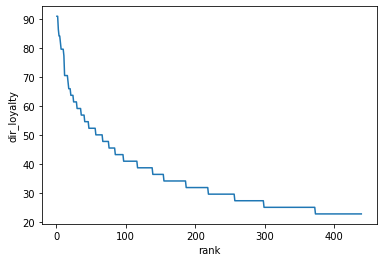

In [ ]:
# nm0000095가 감독한 영화 중 user(x축)들이 본 영화가 차지하는 비중(y축)
# x축 값은 nm0000095의 영화를 많이 본 순서로, 뒤로 갈수록 해당 감독의 영화를 덜 본 유저임
filters= group10[group10.director == 'nm0000095']
sns.lineplot(data=filters, x='rank', y='dir_loyalty')

<AxesSubplot:xlabel='rank', ylabel='dir_loyalty'>

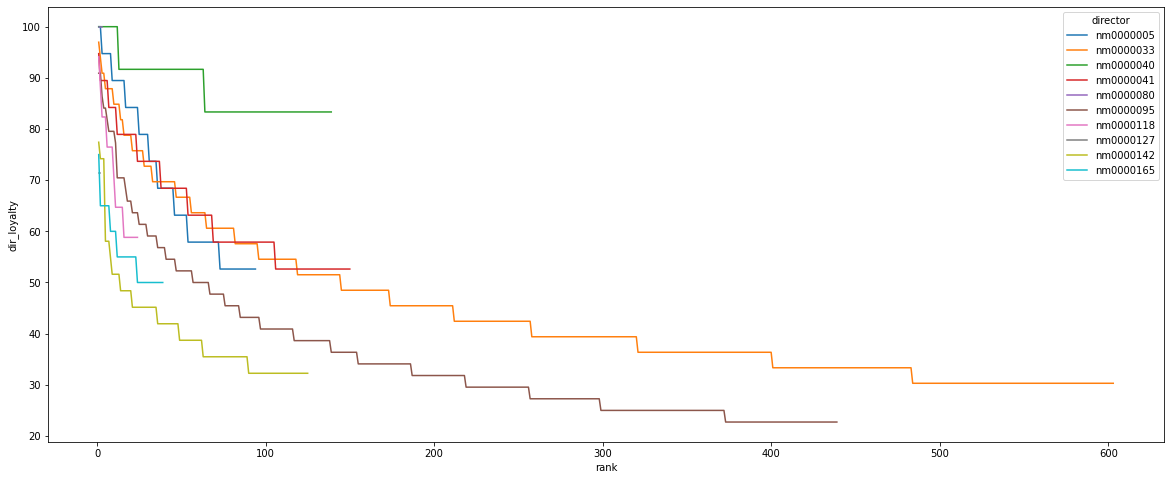

In [ ]:
plt.figure(figsize=(20,8))
filters= group10[group10.director.isin(list(group10.director.unique()[:10]))]
sns.lineplot(data=filters, x='rank', y='dir_loyalty', hue='director')

- 전체적으로 해당 감독의 영화를 덜 보는 유저(x)일 수록, 그 감독의 영화에 대한 로열티(y)가 낮아짐을 확인할 수 있다. 
- 중간에 끊어지는 그래프들의 의미는 다른 감독의 영화에 비해 그 감독의 영화를 10개 이상 본 유저 수가 적다는 것이다. 
    - nm40의 영화를 10개 이상 본 유저 수는 139명이지만 nm33의 영화를 10개 이상 본 유저 수는 603명이다. 
    - 위 문장을 다르게 해석해보면, nm40의 영화를 본 유저들은 많이 없지만, 그 모든 유저들의 로열티는 80% 이상이기 때문에, **그 감독의 영화는 상당히 maniatic한 영화**라고 볼 수 있다. 
    - 반면 nm33의 영화를 본 유저들은 많지만, 로열티가 30%까지 내려가기 때문에, **그 감독의 영화는 일반적인 대중들에게 인기있는 영화**라고 볼 수 있다. 
- 따라서, nm40과 같이 높은 로열티 범위에서 그래프가 끊기는 감독의 영화들은 충성도가 상당히 높은 영화들이기 때문에, 그 감독의 영화를 10개 이상 본 유저들은 다음에도 해당 감독의 영화를 볼 확률이 높을 것이다.

<모델 적용 방향>
- 충성도가 높은 감독의 영화를 10번 이상 본 유저가, 그 감독의 영화 중 보지 않은 영화가 있다면 높은 확률로 추천할 수 있도록 가중치를 부여한다.
    - 우선 로열티 범위 기준은 80%로 잡자.(조정 가능)
    - 즉 특정 감독의 영화를 10번 이상 본 유저의 최소 로열티가 80% 이상인 감독 리스트를 추출한다. 
    - 감독 리스트에 해당되는 감독의 영화를 10개 이상 본 유저들의 negative item에 가중치 0.8(조정 가능)을 적용해줌으로써, 해당 영화가 상위에 추천될 수 있도록 한다. 

In [ ]:
filters[filters.director == 'nm0000040'].sort_values('rank')

,director,user,time,rank,num_mov,dir_loyalty
709,nm0000040,12649,12,1.0,12,100.000000
710,nm0000040,14430,12,2.0,12,100.000000
711,nm0000040,15051,12,3.0,12,100.000000
712,nm0000040,15497,12,4.0,12,100.000000
718,nm0000040,22377,12,5.0,12,100.000000
...,...,...,...,...,...,...
828,nm0000040,130564,10,135.0,12,83.333333
829,nm0000040,130767,10,136.0,12,83.333333
831,nm0000040,133133,10,137.0,12,83.333333
832,nm0000040,133275,10,138.0,12,83.333333


In [ ]:
filters[filters.director == 'nm0000033'].sort_values('rank')

,director,user,time,rank,num_mov,dir_loyalty
329,nm0000033,53018,32,1.0,33,96.969697
571,nm0000033,113246,31,2.0,33,93.939394
453,nm0000033,86106,30,3.0,33,90.909091
558,nm0000033,109077,30,4.0,33,90.909091
95,nm0000033,741,29,5.0,33,87.878788
...,...,...,...,...,...,...
674,nm0000033,133825,10,599.0,33,30.303030
675,nm0000033,133963,10,600.0,33,30.303030
680,nm0000033,134728,10,601.0,33,30.303030
681,nm0000033,134952,10,602.0,33,30.303030


In [ ]:
title_dir= pd.merge(director_data, title_data, on='item', how='right')

In [ ]:
title_dir[title_dir.director=='nm0000033']

,item,director,title
160,904,nm0000033,Rear Window (1954)
168,1219,nm0000033,Psycho (1960)
231,908,nm0000033,North by Northwest (1959)
253,903,nm0000033,Vertigo (1958)
358,1333,nm0000033,"Birds, The (1963)"
702,2186,nm0000033,Strangers on a Train (1951)
733,1086,nm0000033,Dial M for Murder (1954)
884,930,nm0000033,Notorious (1946)
900,928,nm0000033,Rebecca (1940)
921,933,nm0000033,To Catch a Thief (1955)


>[wikipedia]nm33은 서스펜스의 거장 알프레드 히치콕으로, 수십년간 여러 장르의 영화들을 만들며 영화의 작품성을 확장시켰다는 평가를 받았다고 한다. 년에 걸친 경력에서 그는 50편이 넘는 장편 영화를 감독했으며, 그 중 많은 영화가 오늘날에도 널리 시청되고 연구되고 있다.

In [ ]:
title_dir[title_dir.director=='nm0000040']

,item,director,title
82,1258,nm0000040,"Shining, The (1980)"
86,1206,nm0000040,"Clockwork Orange, A (1971)"
99,1222,nm0000040,Full Metal Jacket (1987)
102,750,nm0000040,Dr. Strangelove or: How I Learned to Stop Worr...
123,924,nm0000040,2001: A Space Odyssey (1968)
378,2712,nm0000040,Eyes Wide Shut (1999)
724,2728,nm0000040,Spartacus (1960)
830,1178,nm0000040,Paths of Glory (1957)
948,2729,nm0000040,Lolita (1962)
1011,2730,nm0000040,Barry Lyndon (1975)


> [wikipedia]
nm40은 스탠리 큐브릭으로 영화 역사상 가장 혁신적인 영상을 만든 거장 가운데 한 명으로 손꼽힌다. 완벽주의자로 불릴 정도로 기술적으로 높은 완성도를 추구했으며, 창의적인 촬영 기법으로 미려한 영상을 만들어 많은 영화감독에게 큰 영향을 끼쳤다. 
그가 영화를 발표할 때마다 환호와 비난이 교차하는 논쟁이 벌어지기도 했는데, 그의 작품에서 나타나는 메시지와 그가 추구하는 영상표현을 위한 새로운 테크놀로지에 대한 평가가 서로 충돌하기도 했기 때문이다.

- 히치콕의 영화가 워낙 많아 큐브릭 영화 수와 같은 수의 히치콕 영화를 봤어도 최소 로열티가 낮게 나왔다. 
- 그렇다면 그 감독의 영화를 관람한 수를 로열티로 둬야하나?
    - 하지만 추천을 해야하는 상황에서 조금 더 엄격한 기준을 적용하기 위해선 기존 로열티가 더 확실하다고 생각한다.
    - 아직 보지 않은 수많은 히치콕의 영화 중 하나를 추천하기 보다, 아직 보지않은 적은 수의 큐브릭의 영화 중 하나를 추천하는 것이 더 확실하다고 생각하기 때문이다.